# 概率与统计简介
在本笔记中，我们将实践一些之前讨论过的概念。概率和统计的许多概念在 Python 的主要数据处理库中得到了良好的体现，例如 `numpy` 和 `pandas`。


In [117]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## 随机变量和分布
让我们从0到9的均匀分布中抽取一个包含30个值的样本。我们还将计算均值和方差。


In [118]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [0, 8, 1, 0, 7, 4, 3, 3, 6, 7, 1, 0, 6, 3, 1, 5, 9, 2, 4, 2, 5, 6, 8, 7, 1, 9, 8, 2, 3, 7]
Mean = 4.266666666666667
Variance = 8.195555555555556


要直观地估计样本中有多少不同的值，我们可以绘制**直方图**：


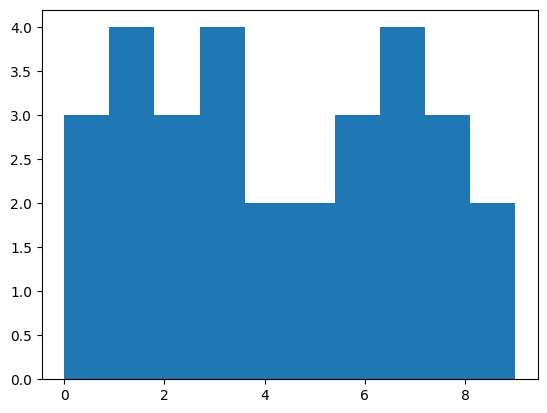

In [119]:
plt.hist(sample)
plt.show()

## 分析真实数据

在分析真实世界的数据时，均值和方差非常重要。让我们从[SOCR MLB 身高/体重数据](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights)中加载有关棒球运动员的数据。


In [120]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])
df


Empty DataFrame
Columns: [Name, Team, Role, Weight, Height, Age]
Index: []


我们在这里使用一个名为 [**Pandas**](https://pandas.pydata.org/) 的库进行数据分析。稍后在本课程中，我们会详细讨论 Pandas 以及如何在 Python 中处理数据。

现在让我们计算年龄、身高和体重的平均值：


In [121]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    201.726306
Weight     73.697292
dtype: float64

现在让我们关注身高，并计算标准差和方差：


In [122]:
print(list(df['Height'])[:20])

[180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 197, 189, 185, 219]


In [123]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.72630560928434
Variance = 441.6355706557866
Standard Deviation = 21.01512718628623


除了平均值，查看中位数和四分位数也是有意义的。它们可以通过一个**箱线图**来可视化：


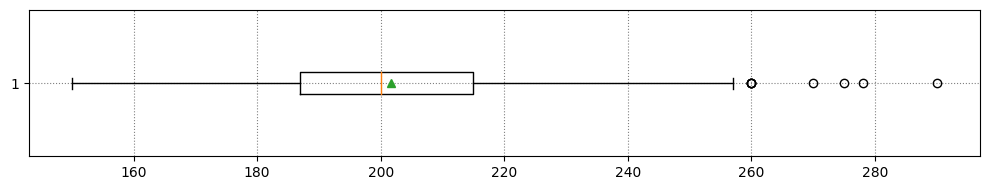

In [124]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

我们还可以根据数据集的子集制作箱线图，例如按玩家角色分组。


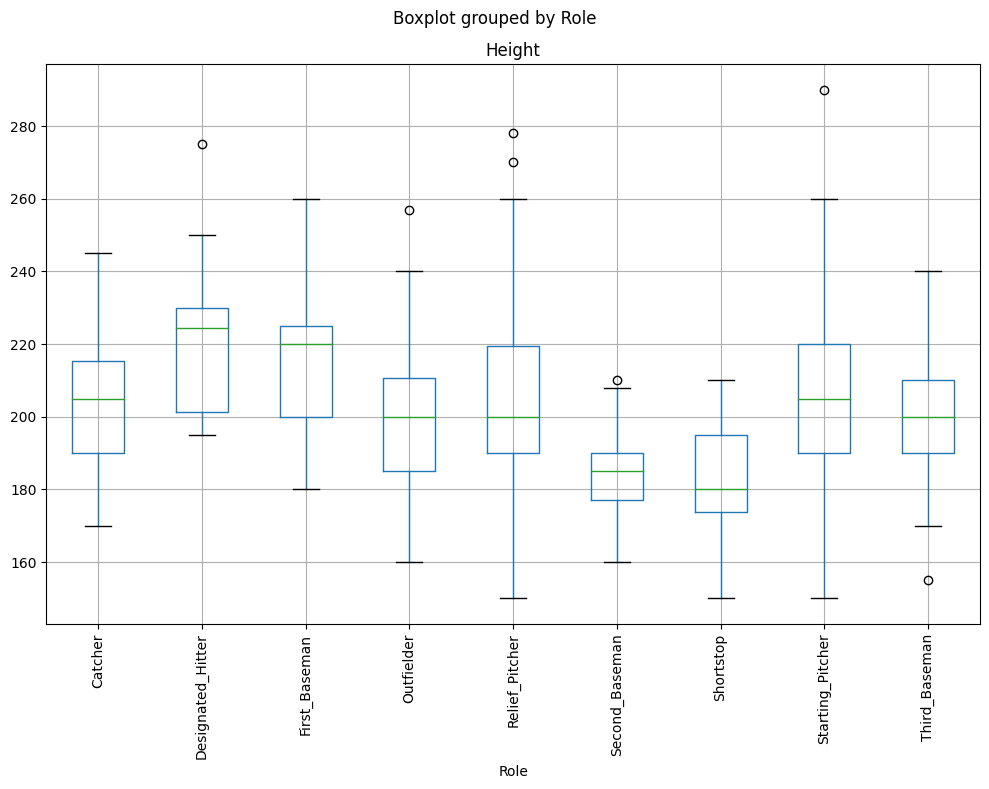

In [125]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **注意**：该图表表明，一垒手的平均身高通常高于二垒手的平均身高。稍后我们将学习如何更正式地检验这一假设，以及如何证明我们的数据在统计上具有显著性来支持这一结论。

年龄、身高和体重都是连续随机变量。你认为它们的分布是什么样的？一个很好的方法是绘制值的直方图：


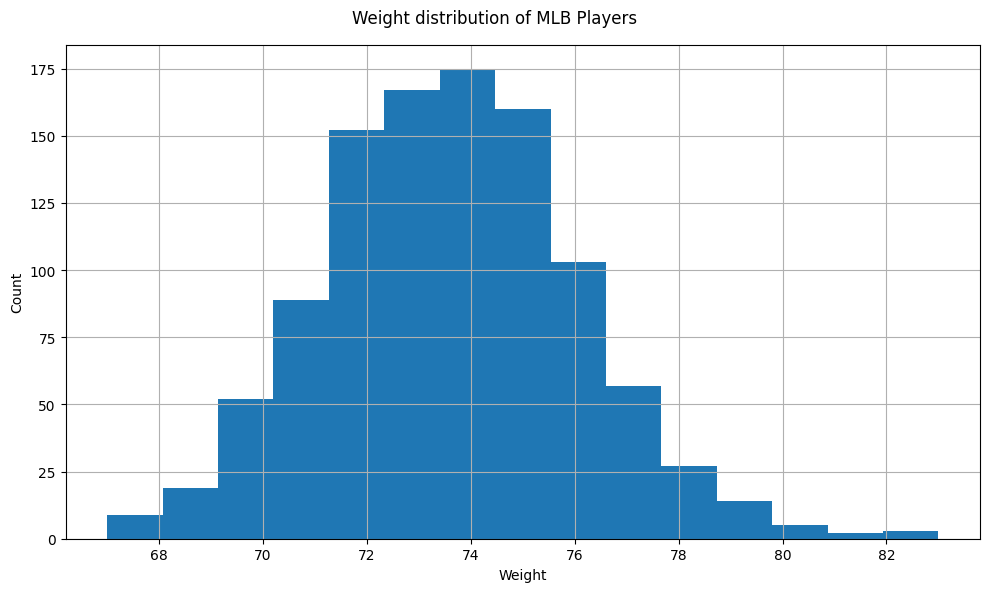

In [126]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 正态分布

让我们创建一个符合正态分布的人工体重样本，其均值和方差与我们的真实数据相同：


In [127]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([183.05261872, 193.52828463, 154.73707302, 204.27140391,
       203.88907247, 213.74665656, 225.10092364, 171.75867917,
       204.3521425 , 207.52870255, 158.53001756, 240.94399197,
       189.9909742 , 180.72442994, 173.4393402 , 175.98883711,
       197.86092769, 188.61598821, 234.19796698, 209.0295457 ])

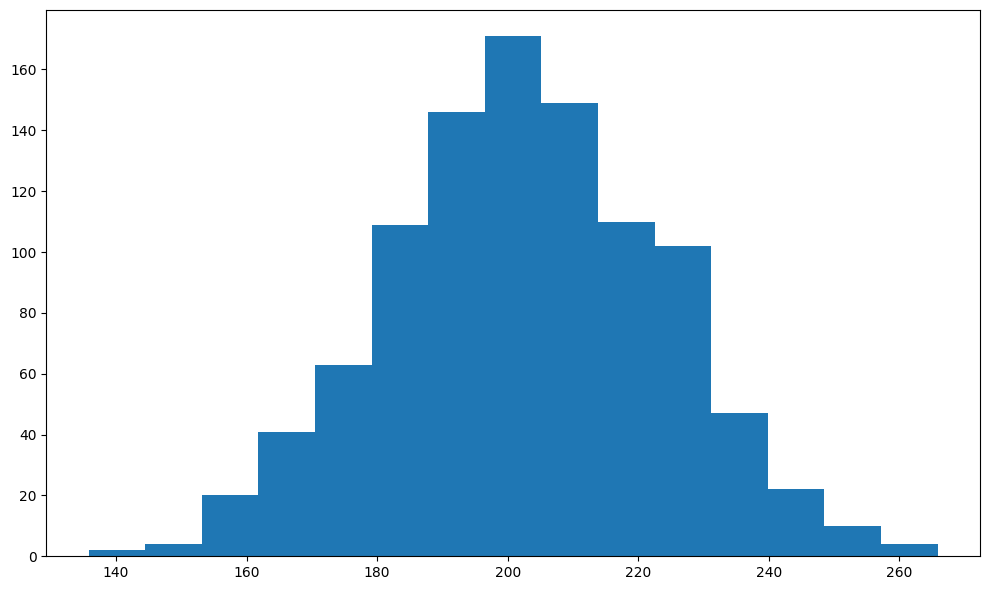

In [128]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

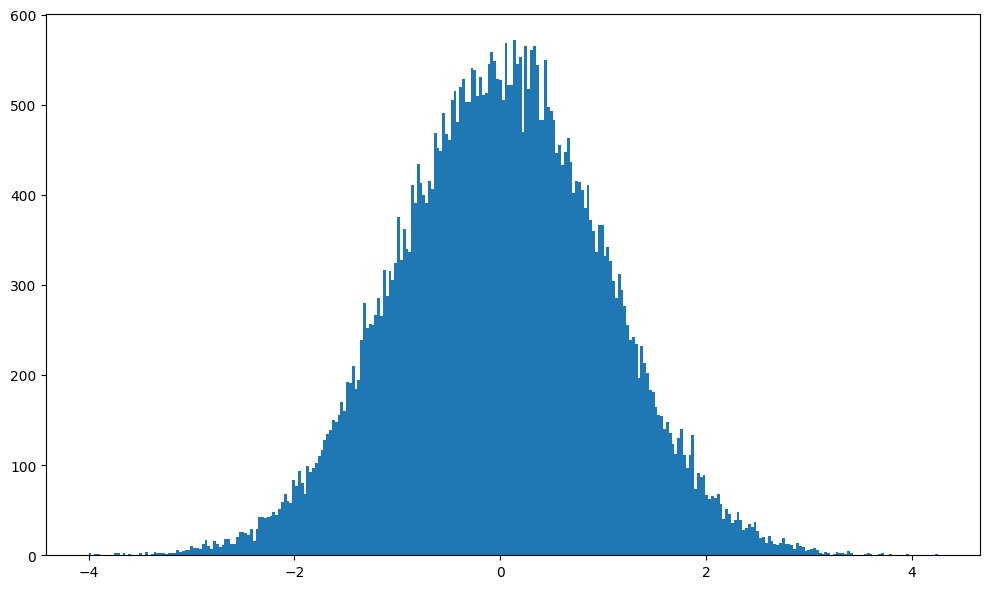

In [129]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

由于现实生活中的大多数数值呈正态分布，我们不应该使用均匀随机数生成器来生成样本数据。以下是尝试使用均匀分布（由`np.random.rand`生成）生成体重时的情况：


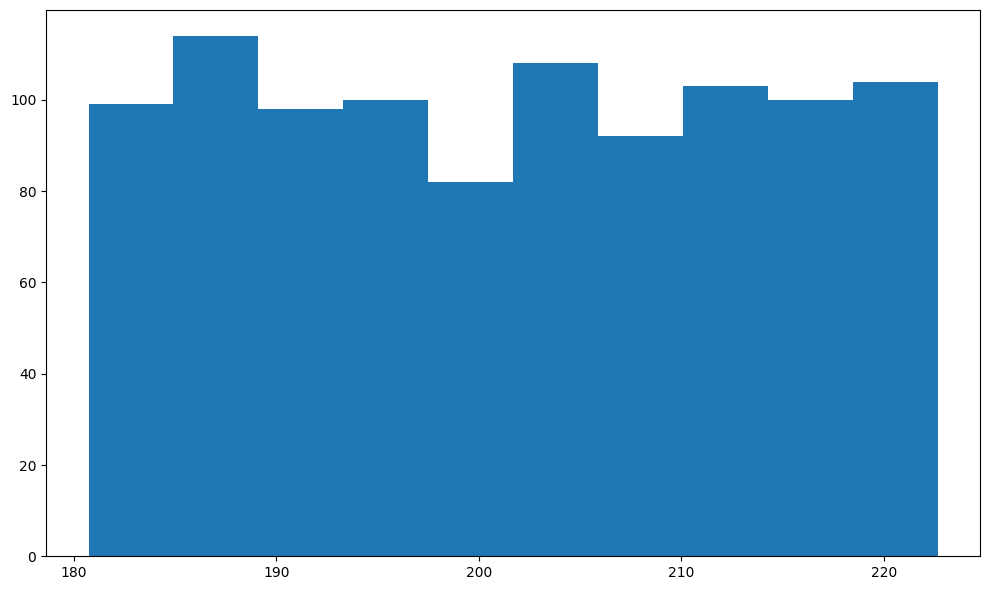

In [130]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## 置信区间

现在我们来计算棒球运动员体重和身高的置信区间。我们将使用[这个 stackoverflow 讨论中的代码](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data)：


In [131]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 73.70 ± 0.10
p=0.90, mean = 73.70 ± 0.12
p=0.95, mean = 73.70 ± 0.14


## 假设检验

让我们来探索棒球运动员数据集中的不同角色：


In [132]:
df.groupby('Role').agg({ 'Weight' : 'mean', 'Height' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

Weight      Height  Count
Role                                           
Catcher            72.723684  204.328947     76
Designated_Hitter  74.222222  220.888889     18
First_Baseman      74.000000  213.109091     55
Outfielder         73.010309  199.113402    194
Relief_Pitcher     74.374603  203.517460    315
Second_Baseman     71.362069  184.344828     58
Shortstop          71.903846  182.923077     52
Starting_Pitcher   74.719457  205.321267    221
Third_Baseman      73.044444  200.955556     45

让我们测试一下一垒手是否比二垒手更高。最简单的方法是测试置信区间：


In [133]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36..216.86, 2nd basemen height: 182.24..186.45
Conf=0.90, 1st basemen height: 208.82..217.40, 2nd basemen height: 181.93..186.76
Conf=0.95, 1st basemen height: 207.97..218.25, 2nd basemen height: 181.45..187.24


我们可以看到这些区间没有重叠。

一种在统计学上更严谨的方法来验证假设是使用**Student t检验**：


In [134]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


`ttest_ind`函数返回的两个值是：  
* p值可以被视为两个分布具有相同均值的概率。在我们的例子中，p值非常低，这表明有强有力的证据支持一垒手更高。  
* t值是用于t检验的标准化均值差的中间值，它会与给定置信水平的阈值进行比较。  


## 使用中心极限定理模拟正态分布

Python 中的伪随机生成器旨在为我们提供均匀分布。如果我们想创建一个正态分布的生成器，可以利用中心极限定理。为了获得一个正态分布的值，我们只需计算一个均匀分布样本的平均值。


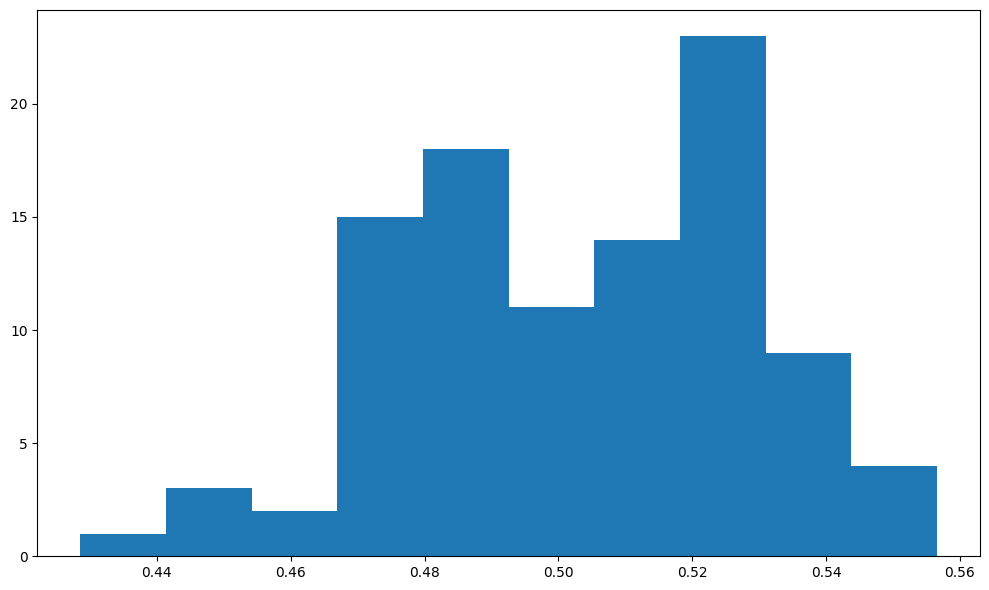

In [135]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## 相关性与邪恶棒球公司

相关性可以帮助我们发现数据序列之间的关系。在我们的示例中，假设有一家邪恶的棒球公司，根据球员的身高来支付薪水——球员越高，薪水越多。假设基础工资是1000美元，额外奖金根据身高从0到100美元不等。我们将使用MLB的真实球员数据，计算他们的假想薪水：


In [136]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180, 1033.985209531635), (215, 1073.6346206518763), (210, 1067.9704190632704), (210, 1067.9704190632704), (188, 1043.0479320734046), (176, 1029.4538482607504), (209, 1066.837578745549), (200, 1056.6420158860585), (231, 1091.760065735415), (180, 1033.985209531635)]


现在让我们计算这些序列的协方差和相关性。`np.cov` 将为我们提供一个所谓的**协方差矩阵**，这是协方差在多变量上的扩展。协方差矩阵 $M$ 的元素 $M_{ij}$ 是输入变量 $X_i$ 和 $X_j$ 之间的相关性，而对角线上的值 $M_{ii}$ 是 $X_i$ 的方差。同样，`np.corrcoef` 将为我们提供**相关矩阵**。


In [137]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[441.63557066 500.30258018]
 [500.30258018 566.76293389]]
Covariance = 500.3025801786725
Correlation = 0.9999999999999997


相关性等于1意味着两个变量之间存在强烈的**线性关系**。我们可以通过将一个值与另一个值作图来直观地看到线性关系：


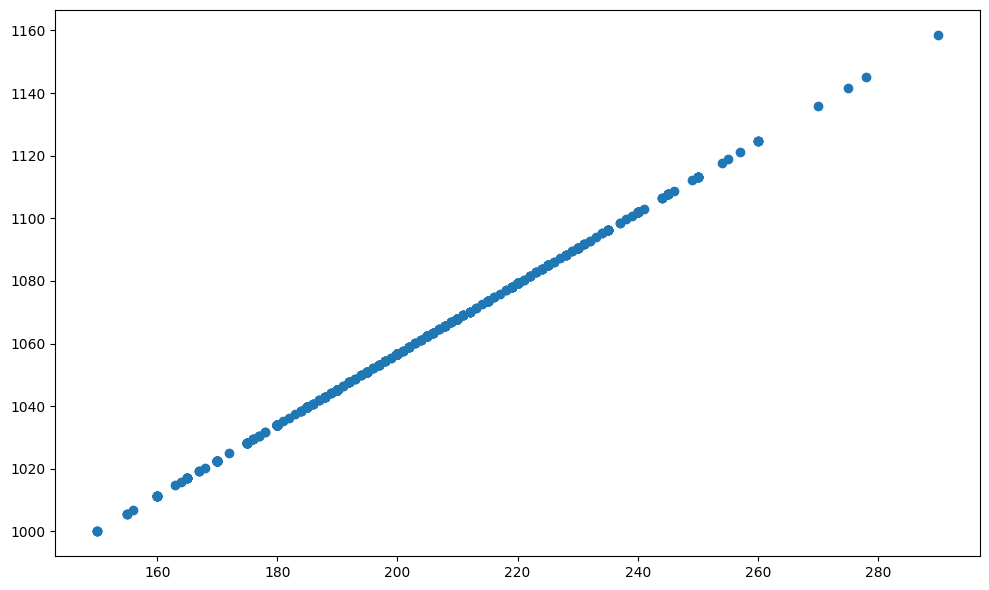

In [138]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

让我们看看如果关系不是线性的会发生什么。假设我们的公司决定隐藏高度和薪资之间明显的线性依赖关系，并在公式中引入一些非线性，例如 `sin`：


In [139]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9910655775558532


在这种情况下，相关性略小一些，但仍然相当高。现在，为了使关系更加不明显，我们可能需要通过向工资中添加一些随机变量来增加一些额外的随机性。让我们看看会发生什么：


In [140]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.948230287835537


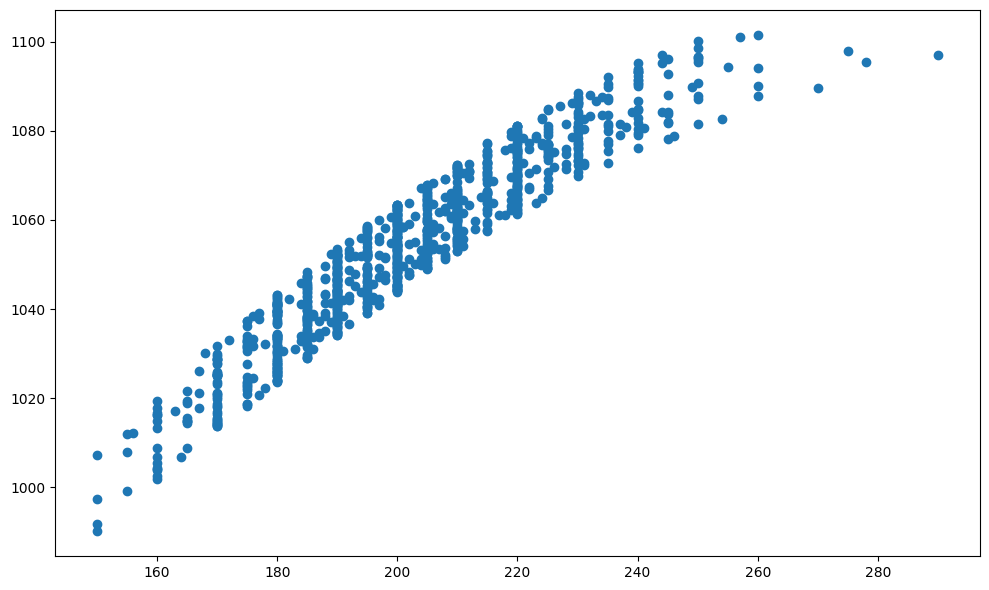

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

> 你能猜出为什么这些点会排列成这样的竖直线吗？

我们已经观察到一个人为设计的概念（如薪资）与观察变量*身高*之间的相关性。现在让我们看看两个观察变量（如身高和体重）是否也存在相关性：


In [142]:
np.corrcoef(df['Height'],df['Weight'])

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

不幸的是，我们没有得到任何结果——只有一些奇怪的 `nan` 值。这是因为我们序列中的某些值是未定义的，用 `nan` 表示，这导致操作的结果也未定义。通过查看矩阵，我们可以发现问题出在 `Weight` 列，因为 `Height` 值之间的自相关已经被计算出来了。

> 这个例子展示了**数据准备**和**清洗**的重要性。如果没有合适的数据，我们无法计算任何内容。

让我们使用 `fillna` 方法填充缺失值，然后计算相关性：


In [143]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

确实存在相关性，但不像我们的人为示例中那样强烈。实际上，如果我们查看一个值与另一个值的散点图，关系就不会那么明显：


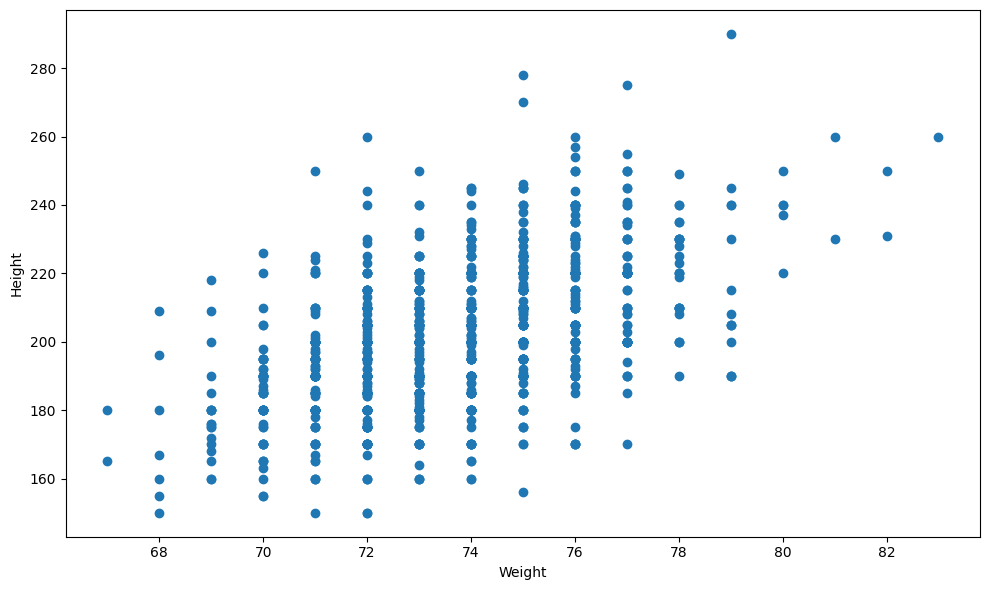

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

## 结论

在本笔记中，我们学习了如何对数据进行基本操作以计算统计函数。我们现在知道如何使用数学和统计的可靠工具来验证一些假设，以及如何根据数据样本计算任意变量的置信区间。



---

**免责声明**：  
本文档使用AI翻译服务[Co-op Translator](https://github.com/Azure/co-op-translator)进行翻译。尽管我们努力确保准确性，但请注意，自动翻译可能包含错误或不准确之处。应以原始语言的文档作为权威来源。对于关键信息，建议使用专业人工翻译。对于因使用本翻译而引起的任何误解或误读，我们概不负责。
